## Data Analysis - Medical Insurance 


**QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with creating an automated system **to estimate the annual medical expenditure for new customers** , using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a [CSV](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

In [101]:
import pandas as pd
df=pd.read_csv('medical.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [103]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [104]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [105]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
COLOR='blue'
matplotlib.rcParams['text.color'] = 'magenta'
matplotlib.rcParams['axes.labelcolor'] = 'blue'
matplotlib.rcParams['xtick.color'] = 'maroon'
matplotlib.rcParams['ytick.color'] = 'maroon'
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = 'w'

## Age
----
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

In [106]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [107]:
fig = px.histogram(df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

## Body Mass Index
-------
Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [108]:
# You can leave out the marginal to remove the top bar
"""
fig = px.histogram(df, 
                   x='bmi', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()
"""
fig = px.histogram(df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

## Charges
-------
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.




In [109]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [110]:
fig = px.histogram(df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['magenta','orange'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

## Smoker
----------
Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram

In [111]:
df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [112]:
px.histogram(df, x='smoker', color='sex', title='Smoker',color_discrete_sequence=['violet','gold'])

## Age and Charges
-----
Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [113]:
fig = px.scatter(df, 
                 x='age', 
                 y='charges', 
                 color='smoker',
                 color_discrete_sequence=['red','green'],
                 opacity=0.7, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

## BMI and Charges

-----
Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.


In [114]:

fig = px.scatter(df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=6)
fig.show()

## Correlation
---
As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.


<img src="https://i.imgur.com/3XUpDlw.png" width="500" height="300">

In [115]:
df.charges.corr(df.age)

0.29900819333064765

In [116]:
df.charges.corr(df.bmi)

0.19834096883362892

In [117]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


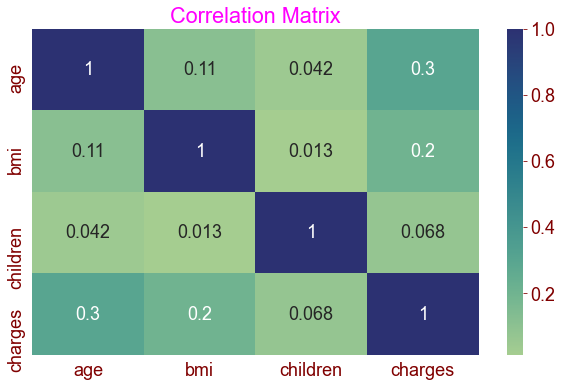

In [118]:
sns.heatmap(df.corr(), cmap='crest', annot=True)
plt.title('Correlation Matrix');

In [119]:
x=df.smoker.astype('category')

## Linear Regression using a Single Feature

---
We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.







In [120]:
non_smoker_df = df[df.smoker == 'no']

In [121]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


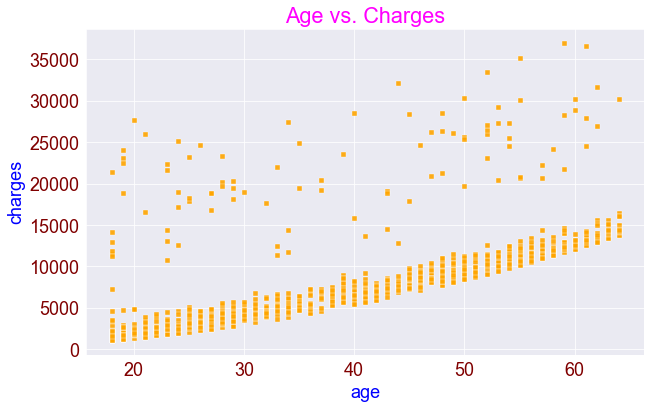

In [122]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.9,s=25,color='orange',marker='s');

# Linear regression using scikit-learn

In [123]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

### Binary encoder

In [124]:
smoker_codes = {'no': 0, 'yes': 1}
df['smoker_code'] = df.smoker.map(smoker_codes)

In [125]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [126]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [127]:
one_hot = enc.transform(df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [128]:
enc.transform([['northeast']]).toarray()

array([[1., 0., 0., 0.]])

In [129]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [130]:
df[['northeast', 'northwest', 'southeast', 'southwest']]=one_hot
df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [131]:
sex_code={'male':0,'female':1}
df['sex_code']=df.sex.map(sex_code)

### Lets Try to `Normalize data`

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [133]:
numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [134]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [135]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [136]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [137]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data =df[cat_cols].values

In [138]:
import numpy as np
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [139]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols,1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8335.168856
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [140]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [141]:
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6393.13035788487


In [142]:
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6007.645810099214


# Prediction 

In [143]:
print("order of most important features arranged by weights")
print(weights_df['feature'].to_string(index=False))

order of most important features arranged by weights
        age
        bmi
   children
smoker_code
   sex_code
  northeast
  northwest
  southeast
  southwest
          1


In [144]:
age= 40
bmi=28
children=3
smoker_code=0
sex_code=1
northeast=0
northwest=0
southeast=1
southwest=0

In [145]:
age_n=(age-scaler.mean_[0])/scaler.var_[0]
bmi_n=(bmi-scaler.mean_[1])/scaler.var_[1]
children_n=(children-scaler.mean_[2])/scaler.var_[2]

details=[age_n,bmi_n,children_n,smoker_code,
         sex_code,northeast,northwest,southeast,southwest]

In [146]:
details

[0.00402007150148516,
 -0.07167358482698932,
 1.3119256703085516,
 0,
 1,
 0,
 0,
 1,
 0]

In [147]:
model.predict([details])

array([8659.27149938])

In [148]:
# to get a idea of Prediction to what people pay
df[(df.age==40) & (df.sex_code==0) & (df.bmi<30) & (df.bmi>25)]

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest,sex_code
67,40,male,26.315,1,no,northwest,6389.37785,0,0.0,1.0,0.0,0.0,0
865,40,male,29.900,2,no,southwest,6600.36100,0,0.0,0.0,0.0,1.0,0
1198,40,male,29.355,1,no,northwest,6393.60345,0,0.0,1.0,0.0,0.0,0
1216,40,male,25.080,0,no,southeast,5415.66120,0,0.0,0.0,1.0,0.0,0
